In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("English_Avi's_Survey.csv")
df.head()

,Unnamed: 0,Gender,Age,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.","I would NOT be interested in this particular organization, except as a last resort.",This organization is defined as attractive to me as a place of employment.,I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
0,0,Male,25-30,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
1,1,Male,25-30,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
2,2,Male,25-30,No,I totally agree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I Agree,I Disagree,I Agree,I neither agree nor disagree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree
3,3,Male,25-30,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
4,4,Male,25-30,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally ag

## Process dataframe

In [4]:
df2 = df.copy()
df2 = df2.drop(df.columns[0], axis=1)
df2

,Gender,Age,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.","I would NOT be interested in this particular organization, except as a last resort.",This organization is defined as attractive to me as a place of employment.,I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
0,Male,25-30,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
1,Male,25-30,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
2,Male,25-30,No,I totally agree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I Agree,I Disagree,I Agree,I neither agree nor disagree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree
3,Male,25-30,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally disagree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
4,Male,25-30,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I Agree,I totally

In [5]:
negative_score = df2.iloc[:, 13]
negative_score

0               I totally disagree
1               I totally disagree
2                       I Disagree
3               I totally disagree
4                  I totally agree
                  ...             
86              I totally disagree
87              I totally disagree
88              I totally disagree
89              I totally disagree
90    I neither agree nor disagree
Name: I would NOT be interested in this particular organization, except as a last resort., Length: 91, dtype: object

In [6]:
df3 = df2.drop(df.columns[14], axis=1)
age_group = df3.iloc[:, 1]
df3 = df3.drop(df3.columns[1], axis=1)
age_group

0     25-30
1     25-30
2     25-30
3     25-30
4     25-30
      ...  
86    18-24
87    18-24
88    25-30
89    25-30
90    25-30
Name: Age, Length: 91, dtype: object

In [7]:
df3

,Gender,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.",This organization is defined as attractive to me as a place of employment.,I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
0,Male,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
1,Male,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
2,Male,No,I totally agree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I Agree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I Agree,I Disagree,I Agree,I neither agree nor disagree,I neither agree nor disagree,I Disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree,I neither agree nor disagree
3,Male,Yes,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree
4,Male,No,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I Agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I totally agree,I Agr

In [8]:
df_processed = df3.replace({"Male": 0, "Female": 1, "No": 0, "Yes": 1, "I totally disagree": 0,
                          "I Disagree": 1, "I neither agree nor disagree": 2, "I Agree": 3, 
                          "I totally agree": 4})
df_processed.head()

,Gender,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.",This organization is defined as attractive to me as a place of employment.,I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,0,0,4,3,2,1,2,3,2,1,2,2,2,2,2,3,1,3,2,2,1,2,2,2,2
3,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,0,0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,3,4,3,4,4


In [9]:
negative_score_processed = negative_score.replace({"I totally disagree": 4,"I Disagree": 3, 
                                                   "I neither agree nor disagree": 2, "I Agree": 1,
                                                   "I totally agree": 0})
negative_score_processed

0     4
1     4
2     3
3     4
4     0
     ..
86    4
87    4
88    4
89    4
90    2
Name: I would NOT be interested in this particular organization, except as a last resort., Length: 91, dtype: int64

In [10]:
age_group_processed = pd.get_dummies(age_group)
age_group_processed

,18-24,25-30,31-40
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
86,1,0,0
87,1,0,0
88,0,1,0
89,0,1,0


In [11]:
df_final = df_processed
df_final.insert(13,"I would NOT be interested in this particular organization, except as a last resort.",negative_score_processed)
df_final.insert(0, "18-24", age_group_processed["18-24"])
df_final.insert(1, "25-30", age_group_processed["25-30"])
df_final.insert(2, "31-40", age_group_processed["31-40"])
df_final

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.",This organization is defined as attractive to me as a place of employment.,"I would NOT be interested in this particular organization, except as a last resort.",I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
0,0,1,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,0,1,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,0,1,0,0,0,4,3,2,1,2,3,2,1,2,2,2,3,2,2,3,1,3,2,2,1,2,2,2,2
3,0,1,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,0,1,0,0,0,4,4,4,4,4,3,4,4,4,4,4,0,4,4,4,4,4,4,4,3,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,0,0,0,0,4,4,4,4,4,4,3,3,3,4,2,4,4,2,4,2,4,2,4,2,3,2,2,2
87,1,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
88,0,1,0,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
89,0,1,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


## Generalize dataframe

In [12]:
Perceived_Ease_of_Use = df_final.iloc[:,5:11].sum(axis=1)

Perceived_Usefulness = df_final.iloc[:,11:14].sum(axis=1)

General_Attractiveness = df_final.iloc[:,14:19].sum(axis=1)

Behavioural_Intentions = df_final.iloc[:,19:24].sum(axis=1)

Prestige = df_final.iloc[:,24:29].sum(axis=1)

## Cronbach's alpha reliability coefficient

In [13]:
print("Perceived_Ease_of_Use: ci=95%")
pg.cronbach_alpha(data=df_final.iloc[:,5:11]) 

Perceived_Ease_of_Use: ci=95%


(0.9242914313908229, array([0.897, 0.946]))

In [14]:
print("Perceived_Usefulness: ci=95%")
pg.cronbach_alpha(data=df_final.iloc[:,11:14])

Perceived_Usefulness: ci=95%


(0.9393151897649713, array([0.914, 0.958]))

In [15]:
print("General_Attractiveness: ci=95%")
pg.cronbach_alpha(data=df_final.iloc[:,14:19])

General_Attractiveness: ci=95%


(0.929298266803551, array([0.903, 0.95 ]))

In [16]:
print("Behavioural_Intentions: ci=95%")
pg.cronbach_alpha(data=df_final.iloc[:,19:24])

Behavioural_Intentions: ci=95%


(0.9106781225802607, array([0.878, 0.937]))

In [17]:
print("Prestige: ci=95%")
pg.cronbach_alpha(data=df_final.iloc[:,24:29])

Prestige: ci=95%


(0.9426431516812733, array([0.922, 0.959]))

In [18]:
general_table = df_final.iloc[:,0:5]

general_table.head()

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?
0,0,1,0,0,0
1,0,1,0,0,1
2,0,1,0,0,0
3,0,1,0,0,1
4,0,1,0,0,0


In [19]:
general_table["Perceived_Ease_of_Use"] = Perceived_Ease_of_Use
general_table["Perceived_Usefulness"] = Perceived_Usefulness
general_table["General_Attractiveness"] = General_Attractiveness
general_table["Behavioural_Intentions"] = Behavioural_Intentions
general_table["Prestige"] = Prestige
general_table.head()

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
0,0,1,0,0,0,24,12,20,20,20
1,0,1,0,0,1,24,12,20,20,20
2,0,1,0,0,0,15,5,11,11,9
3,0,1,0,0,1,24,12,20,20,20
4,0,1,0,0,0,23,12,16,20,18


## Finding Correlations

In [20]:
correlation_table = general_table.corr(method='pearson')
correlation_table

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
18-24,1.000000,-0.935689,-0.163517,0.148007,-0.247456,0.140491,0.149505,0.132866,0.168974,0.137171
25-30,-0.935689,1.000000,-0.195077,-0.122943,0.286655,-0.056814,-0.104717,-0.069886,-0.101202,-0.088774
31-40,-0.163517,-0.195077,1.000000,-0.067669,-0.113636,-0.231680,-0.122794,-0.173932,-0.186743,-0.133088
Gender,0.148007,-0.122943,-0.067669,1.000000,-0.044933,-0.250924,-0.120237,-0.119588,-0.131645,-0.033588
Have you previously given an asynchronous video interview to an organization?,-0.247456,0.286655,-0.113636,-0.044933,1.000000,0.150414,0.132469,0.209323,0.255731,0.292372
Perceived_Ease_of_Use,0.140491,-0.056814,-0.231680,-0.250924,0.150414,1.000000,0.729670,0.716109,0.678888,0.625735
Perceived_Usefulness,0.149505,-0.104717,-0.122794,-0.120237,0.132469,0.729670,1.000000,0.835117,0.804513,0.778471
General_Attractiveness,0.132866,-0.069886,-0.173932,-0.119588,0.209323,0.716109,0.835117,1.000000,0.927781,0.858892
Behavioural_Intentions,0.168974,-0.101202,-0.186743,-0.131645,0.255731,0.678888,0.804513,0.927781,1.000000,0.887266
Prestige,0.137171,-0.088774,-0.133088,-0.033588,0.292372,0.625735,0.778471,0.858892,0.887266,1.000000


### Function to calculate p-value from pearson correlation table

In [21]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [22]:
pvalues = calculate_pvalues(general_table)
pvalues

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
18-24,0.0,0.0,0.1214,0.1615,0.018,0.1841,0.1572,0.2093,0.1093,0.1948
25-30,0.0,0.0,0.0639,0.2456,0.0059,0.5927,0.3232,0.5104,0.3398,0.4027
31-40,0.1214,0.0639,0.0,0.5239,0.2835,0.0271,0.2462,0.0992,0.0763,0.2085
Gender,0.1615,0.2456,0.5239,0.0,0.6724,0.0164,0.2563,0.2589,0.2135,0.7519
Have you previously given an asynchronous video interview to an organization?,0.018,0.0059,0.2835,0.6724,0.0,0.1547,0.2107,0.0464,0.0144,0.0049
Perceived_Ease_of_Use,0.1841,0.5927,0.0271,0.0164,0.1547,0.0,0.0,0.0,0.0,0.0
Perceived_Usefulness,0.1572,0.3232,0.2462,0.2563,0.2107,0.0,0.0,0.0,0.0,0.0
General_Attractiveness,0.2093,0.5104,0.0992,0.2589,0.0464,0.0,0.0,0.0,0.0,0.0
Behavioural_Intentions,0.1093,0.3398,0.0763,0.2135,0.0144,0.0,0.0,0.0,0.0,0.0
Prestige,0.1948,0.4027,0.2085,0.7519,0.0049,0.0,0.0,0.0,0.0,0.0


### Function that filters values in dataframe based on condition

In [23]:
def value_to_NaN(df, value, op):
    filtered_values = df
    if op == ">":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) > value, col] = "NaN"
    elif op == "=":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) == value, col] = "NaN"
    elif op == "<":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) < value, col] = "NaN"
    else:
        filtered_values = "opperation is not supported"
    return filtered_values

## Checking correlations statistical importance using p-value

In [24]:
important_pvalues = value_to_NaN(pvalues, 0.05, ">")
important_pvalues

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
18-24,0.0,0.0,NaN,NaN,0.018,NaN,NaN,NaN,NaN,NaN
25-30,0.0,0.0,NaN,NaN,0.0059,NaN,NaN,NaN,NaN,NaN
31-40,NaN,NaN,0.0,NaN,NaN,0.0271,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,0.0,NaN,0.0164,NaN,NaN,NaN,NaN
Have you previously given an asynchronous video interview to an organization?,0.018,0.0059,NaN,NaN,0.0,NaN,NaN,0.0464,0.0144,0.0049
Perceived_Ease_of_Use,NaN,NaN,0.0271,0.0164,NaN,0.0,0.0,0.0,0.0,0.0
Perceived_Usefulness,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
General_Attractiveness,NaN,NaN,NaN,NaN,0.0464,0.0,0.0,0.0,0.0,0.0
Behavioural_Intentions,NaN,NaN,NaN,NaN,0.0144,0.0,0.0,0.0,0.0,0.0
Prestige,NaN,NaN,NaN,NaN,0.0049,0.0,0.0,0.0,0.0,0.0


In [25]:
important_pvalues = value_to_NaN(pvalues, 0.01, ">")
important_pvalues

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
18-24,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-30,0.0,0.0,NaN,NaN,0.0059,NaN,NaN,NaN,NaN,NaN
31-40,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Have you previously given an asynchronous video interview to an organization?,NaN,0.0059,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0049
Perceived_Ease_of_Use,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Perceived_Usefulness,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
General_Attractiveness,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Behavioural_Intentions,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Prestige,NaN,NaN,NaN,NaN,0.0049,0.0,0.0,0.0,0.0,0.0


## Displaying the important correlations

In [26]:
important_correlation_table = correlation_table

for col in correlation_table.columns:
    for index in correlation_table.index:
        if important_pvalues.loc[col, index] == "NaN":
            important_correlation_table.loc[col, index] = "NaN"

important_correlation_table

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
18-24,1.0,-0.935689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-30,-0.935689,1.0,NaN,NaN,0.286655,NaN,NaN,NaN,NaN,NaN
31-40,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Have you previously given an asynchronous video interview to an organization?,NaN,0.286655,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.292372
Perceived_Ease_of_Use,NaN,NaN,NaN,NaN,NaN,1.0,0.72967,0.716109,0.678888,0.625735
Perceived_Usefulness,NaN,NaN,NaN,NaN,NaN,0.72967,1.0,0.835117,0.804513,0.778471
General_Attractiveness,NaN,NaN,NaN,NaN,NaN,0.716109,0.835117,1.0,0.927781,0.858892
Behavioural_Intentions,NaN,NaN,NaN,NaN,NaN,0.678888,0.804513,0.927781,1.0,0.887266
Prestige,NaN,NaN,NaN,NaN,0.292372,0.625735,0.778471,0.858892,0.887266,1.0


In [27]:
important_correlation_table_2 = important_correlation_table.iloc[5:, 5:]
important_correlation_table_2

,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
Perceived_Ease_of_Use,1.0,0.72967,0.716109,0.678888,0.625735
Perceived_Usefulness,0.72967,1.0,0.835117,0.804513,0.778471
General_Attractiveness,0.716109,0.835117,1.0,0.927781,0.858892
Behavioural_Intentions,0.678888,0.804513,0.927781,1.0,0.887266
Prestige,0.625735,0.778471,0.858892,0.887266,1.0


## Confidence Interval for Correlation

### - Step 1: Create functions

In [28]:
def se_z(df, alpha=0.05):
    se = 1/np.sqrt(len(df.index)-3)
    z = stats.norm.ppf(1-alpha/2)
    return se, z

def conf_inter(r, se, z):
    r_z = np.arctanh(r) 
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    lo = round(lo, 4)
    hi = round(hi, 4)
    lo_and_hi = "({in1}, {in2})".format(in1=str(lo), in2=str(hi))
    return lo_and_hi

def ci_df(df, se, z):
    se = se
    z = z
    ci = df.copy()
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            ci_value = conf_inter(tmp[r][c], se, z)
            ci[r][c] = ci_value
    return ci 

### - Step 2: Pass desired values

In [29]:
se, z = se_z(general_table, 0.05)

corr_ci_df = ci_df(important_correlation_table_2, se, z)

corr_ci_df

C:\Users\gpari\AppData\Local\Temp\ipykernel_15336\3057536951.py:7: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
Perceived_Ease_of_Use,"(1.0, 1.0)","(0.6163, 0.8134)","(0.5984, 0.8035)","(0.5498, 0.7763)","(0.4819, 0.7367)"
Perceived_Usefulness,"(0.6163, 0.8134)","(1.0, 1.0)","(0.7599, 0.8883)","(0.7174, 0.8668)","(0.6818, 0.8484)"
General_Attractiveness,"(0.5984, 0.8035)","(0.7599, 0.8883)","(1.0, 1.0)","(0.8923, 0.9519)","(0.7933, 0.9048)"
Behavioural_Intentions,"(0.5498, 0.7763)","(0.7174, 0.8668)","(0.8923, 0.9519)","(1.0, 1.0)","(0.8337, 0.9243)"
Prestige,"(0.4819, 0.7367)","(0.6818, 0.8484)","(0.7933, 0.9048)","(0.8337, 0.9243)","(1.0, 1.0)"


## Creating Heatmap

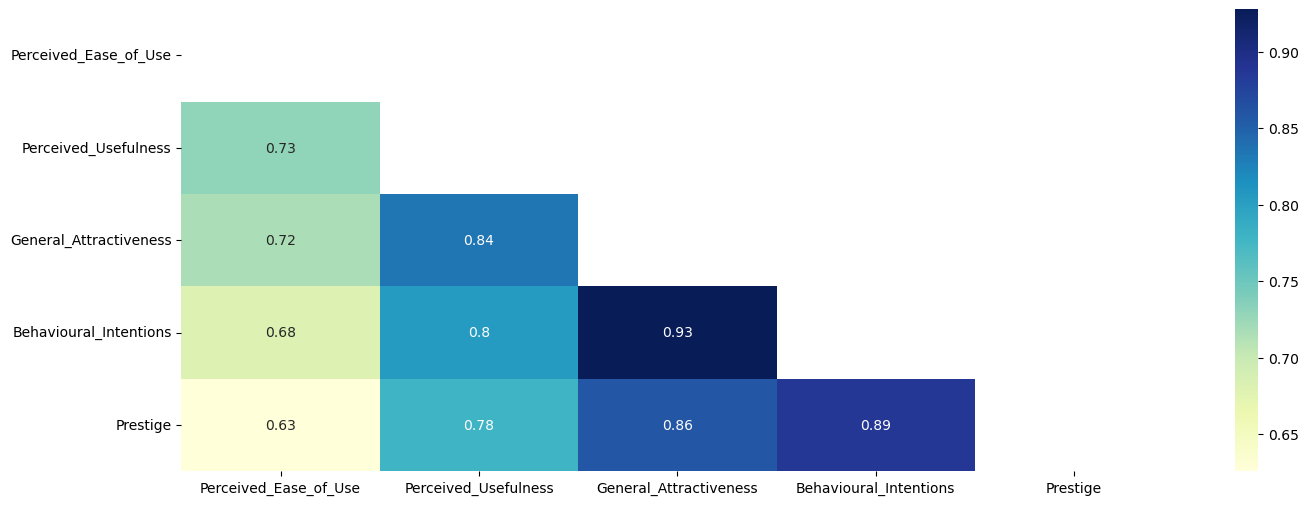

In [30]:
plt.figure(figsize=(16, 6))

important_correlation_table_2 = important_correlation_table_2.astype(float)

mask = np.triu(np.ones_like(important_correlation_table_2))

dataplot = sns.heatmap(important_correlation_table_2, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

## Describing Data

In [31]:
df_final.describe()

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,"I believe, I would easily understand the functions of the online program through which I would grant the asynchronous video interview.",I believe that the online program through which I would grant an asynchronous video interview would be easy to perform the relevant actions.,My interaction with the online program through which I would grant an asynchronous video interview would be clear and understandable.,I would find asynchronous video interviewing—as a technology—flexible in my interaction.,It would be easy for me to complete an asynchronous video interview.,I think that asynchronous video interviewing—as a technology tool—would be easy to use.,Asynchronous video interviewing would facilitate me to perform highly in a selection process of job applicants who will be invited for a face-to-face interview.,Asynchronous video interviews would make my life easier as a job seeker.,I think asynchronous video interviewing would be useful for me as a job seeker.,"From my perspective, this organization would be a satisfactory place for me to work.",This organization is defined as attractive to me as a place of employment.,"I would NOT be interested in this particular organization, except as a last resort.",I am interested in learning more about this organization.,I am particularly attracted to a job position in this organization.,I would accept a job offer from this organization.,I would make this organization one of my first choices as an employer.,"If this organization invited me for a face-to-face interview, I would attend.",I would be willing to put in a lot of effort to work for this organization.,I would recommend this organization to a friend who is looking for work.,Employees of that organization may feel proud when they report working for that organization.,This is a reliable organization to work for.,This organization is likely to have a reputation as an excellent employer.,I would consider this organization a prestigious place to work.,"Probably, there are quite a few people who would like to work in this organization."
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.439560,0.527473,0.032967,0.516484,0.274725,3.450549,3.373626,3.329670,3.252747,3.252747,3.274725,2.945055,2.978022,3.010989,3.032967,2.868132,3.098901,3.065934,2.813187,3.208791,2.780220,3.549451,2.791209,3.076923,2.703297,2.989011,2.758242,2.725275,3.054945
std,0.499083,0.502011,0.179540,0.502497,0.448849,0.687406,0.724927,0.817244,0.901769,0.926084,0.870069,1.036690,1.032559,1.027343,0.924368,1.013342,1.065155,0.963814,1.114671,0.850052,1.093437,0.637072,1.100671,0.957204,1.016470,0.924896,1.047119,1.116203,0.873850
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.

In [32]:
general_table_2 = df_final.iloc[:,0:5]

general_table_2["Perceived_Ease_of_Use"] = Perceived_Ease_of_Use / 6
general_table_2["Perceived_Usefulness"] = Perceived_Usefulness / 3
general_table_2["General_Attractiveness"] = General_Attractiveness / 5
general_table_2["Behavioural_Intentions"] = Behavioural_Intentions /5
general_table_2["Prestige"] = Prestige / 5

general_table_2.head()

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
0,0,1,0,0,0,4.000000,4.000000,4.0,4.0,4.0
1,0,1,0,0,1,4.000000,4.000000,4.0,4.0,4.0
2,0,1,0,0,0,2.500000,1.666667,2.2,2.2,1.8
3,0,1,0,0,1,4.000000,4.000000,4.0,4.0,4.0
4,0,1,0,0,0,3.833333,4.000000,3.2,4.0,3.6


In [33]:
general_description = general_table_2.describe()
general_description

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.439560,0.527473,0.032967,0.516484,0.274725,3.322344,2.978022,2.975824,3.081319,2.846154
std,0.499083,0.502011,0.179540,0.502497,0.448849,0.703519,0.974746,0.899301,0.809926,0.901395
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.800000,1.000000,1.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.666667,2.333333,2.300000,2.500000,2.200000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3.500000,3.000000,3.000000,3.000000,2.600000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Coefficient of Variation

### Distributions with CV < 1 are considered low-variance

In [34]:
CV = general_description.iloc[2,:] / general_description.iloc[1,:]
CV

18-24                                                                            1.135415
25-30                                                                            0.951728
31-40                                                                            5.446032
Gender                                                                           0.972919
Have you previously given an asynchronous video interview to an organization?    1.633809
Perceived_Ease_of_Use                                                            0.211754
Perceived_Usefulness                                                             0.327313
General_Attractiveness                                                           0.302202
Behavioural_Intentions                                                           0.262851
Prestige                                                                         0.316706
dtype: float64

## Confidence Interval for Mean

In [35]:
from scipy.stats import ttest_1samp

print("---Perceived_Ease_of_Use---")
print("Mean t-test and p-value", ttest_1samp(a=general_table_2["Perceived_Ease_of_Use"], 
                                                  popmean=3))
print("Confidence Interval: ", stats.t.interval(confidence=0.95, 
                 loc=np.mean(general_table_2["Perceived_Ease_of_Use"]), 
                 df=len(general_table_2["Perceived_Ease_of_Use"])-1,
                 scale=stats.sem(general_table_2["Perceived_Ease_of_Use"])))

print("---Perceived_Usefulness---")
print("Mean t-test and p-value", ttest_1samp(a=general_table_2["Perceived_Usefulness"], 
                                                  popmean=3))
print("Confidence Interval: ", stats.t.interval(confidence=0.95, 
                 loc=np.mean(general_table_2["Perceived_Usefulness"]), 
                 df=len(general_table_2["Perceived_Usefulness"])-1,
                 scale=stats.sem(general_table_2["Perceived_Usefulness"])))

print("---General_Attractiveness---")
print("Mean t-statistic and p-value", ttest_1samp(a=general_table_2["General_Attractiveness"], 
                                                  popmean=3))
print("Confidence Interval: ", stats.t.interval(confidence=0.95, 
                 loc=np.mean(general_table_2["General_Attractiveness"]), 
                 df=len(general_table_2["General_Attractiveness"])-1,
                 scale=stats.sem(general_table_2["General_Attractiveness"])))

print("---Behavioural_Intentions---")
print("Mean t-test and p-value", ttest_1samp(a=general_table_2["Behavioural_Intentions"], 
                                                  popmean=3))
print("Confidence Interval: ", stats.t.interval(confidence=0.95, 
                 loc=np.mean(general_table_2["Behavioural_Intentions"]), 
                 df=len(general_table_2["Behavioural_Intentions"])-1,
                 scale=stats.sem(general_table_2["Behavioural_Intentions"])))

print("---Prestige---")
print("Mean t-test and p-value", ttest_1samp(a=general_table_2["Prestige"], 
                                                  popmean=3))
print("Confidence Interval: ", stats.t.interval(confidence=0.95, 
                 loc=np.mean(general_table_2["Prestige"]), 
                 df=len(general_table_2["Prestige"])-1,
                 scale=stats.sem(general_table_2["Prestige"])))

---Perceived_Ease_of_Use---
Mean t-test and p-value Ttest_1sampResult(statistic=4.370836965347007, pvalue=3.311631376694483e-05)
Confidence Interval:  (3.175829303921381, 3.468859340767262)
---Perceived_Usefulness---
Mean t-test and p-value Ttest_1sampResult(statistic=-0.21508892014096848, pvalue=0.830184643996601)
Confidence Interval:  (2.7750213925553138, 3.1810225634886424)
---General_Attractiveness---
Mean t-statistic and p-value Ttest_1sampResult(statistic=-0.2564465653348379, pvalue=0.798191328589064)
Confidence Interval:  (2.788535668665186, 3.163112682983165)
---Behavioural_Intentions---
Mean t-test and p-value Ttest_1sampResult(statistic=0.9577795737199316, pvalue=0.34073976252591487)
Confidence Interval:  (2.912643384536376, 3.249993978100985)
---Prestige---
Mean t-test and p-value Ttest_1sampResult(statistic=-1.6281418077132372, pvalue=0.10699066961013329)
Confidence Interval:  (2.658429266166951, 3.0338784261407414)


In [36]:
#Failed to provide evidence that the null hypothesis is false for every category except "Perceived_Ease_of_Use"

## Median and Mode

In [37]:
median = general_table_2.median(axis=0)
median

18-24                                                                            0.0
25-30                                                                            1.0
31-40                                                                            0.0
Gender                                                                           1.0
Have you previously given an asynchronous video interview to an organization?    0.0
Perceived_Ease_of_Use                                                            3.5
Perceived_Usefulness                                                             3.0
General_Attractiveness                                                           3.0
Behavioural_Intentions                                                           3.0
Prestige                                                                         2.6
dtype: float64

In [38]:
mode = general_table_2.mode(axis=0)
mode

,18-24,25-30,31-40,Gender,Have you previously given an asynchronous video interview to an organization?,Perceived_Ease_of_Use,Perceived_Usefulness,General_Attractiveness,Behavioural_Intentions,Prestige
0,0,1,0,1,0,4.0,4.0,4.0,4.0,4.0


## Confidence Interval for Median

In [39]:
n = len(general_table_2["Prestige"])
q = 0.5

j = round(n*q - (z*np.sqrt(n*q*(1-q))))
k = round(n*q + (z*np.sqrt(n*q*(1-q))))

In [40]:
general_table_2.sort_values(by=["Perceived_Ease_of_Use"]).iloc[j:k,[5]]

,Perceived_Ease_of_Use
58,3.000000
60,3.166667
20,3.166667
12,3.166667
61,3.166667
24,3.333333
18,3.333333
16,3.333333
47,3.333333
35,3.500000


In [41]:
general_table_2.sort_values(by=["Perceived_Usefulness"]).iloc[j:k,[6]]

,Perceived_Usefulness
63,2.666667
90,2.666667
7,2.666667
22,2.666667
11,3.000000
61,3.000000
33,3.000000
9,3.000000
29,3.000000
58,3.000000


In [42]:
general_table_2.sort_values(by=["General_Attractiveness"]).iloc[j:k,[7]]

,General_Attractiveness
20,2.6
30,2.8
54,2.8
52,2.8
11,2.8
14,2.8
48,2.8
44,2.8
67,3.0
17,3.0


In [43]:
general_table_2.sort_values(by=["Behavioural_Intentions"]).iloc[j:k,[8]]

,Behavioural_Intentions
50,2.8
10,2.8
30,2.8
11,2.8
38,3.0
20,3.0
56,3.0
42,3.0
18,3.0
33,3.0


In [44]:
general_table_2.sort_values(by=["Prestige"]).iloc[j:k,[9]]

,Prestige
90,2.4
14,2.4
18,2.4
20,2.4
51,2.6
9,2.6
52,2.6
81,2.6
48,2.6
24,2.6


## Skewness

In [45]:
SkewValue_general = general_table_2.skew(axis=0).to_frame()

SkewValue_general 

,0
18-24,0.247645
25-30,-0.111910
31-40,5.319477
Gender,-0.067081
Have you previously given an asynchronous video interview to an organization?,1.026346
Perceived_Ease_of_Use,-0.499496
Perceived_Usefulness,-0.519637
General_Attractiveness,-0.385258
Behavioural_Intentions,-0.298588
Prestige,0.113452


For Perceived_Ease _of_Use until Prestige we should have negative skewness since mode>median>mean 
Except for prestige where mode>mean>median

## IQR

#### The interquartile range is the best measure of variability for skewed distributions or data sets with outliers.

In [46]:
#define function to calculate interquartile range
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

general_table_2[["Perceived_Ease_of_Use", "Perceived_Usefulness", "General_Attractiveness",
                "Behavioural_Intentions", "Prestige"]].apply(find_iqr)

Perceived_Ease_of_Use     1.333333
Perceived_Usefulness      1.666667
General_Attractiveness    1.700000
Behavioural_Intentions    1.500000
Prestige                  1.800000
dtype: float64

## Kurtosis

In [47]:
Kurtosis_general =  general_table_2.kurtosis(axis=0).to_frame()
Kurtosis_general

,0
18-24,-1.982748
25-30,-2.032649
31-40,26.887420
Gender,-2.040854
Have you previously given an asynchronous video interview to an organization?,-0.968391
Perceived_Ease_of_Use,-1.127105
Perceived_Usefulness,-0.532982
General_Attractiveness,-0.774262
Behavioural_Intentions,-0.982542
Prestige,-1.375622


# Data Visualization

### -Histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Perceived_Ease_of_Use'>

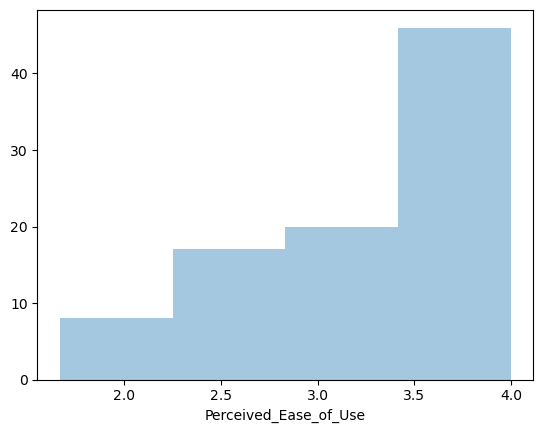

In [48]:
sns.distplot( a=general_table_2["Perceived_Ease_of_Use"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='Perceived_Usefulness'>

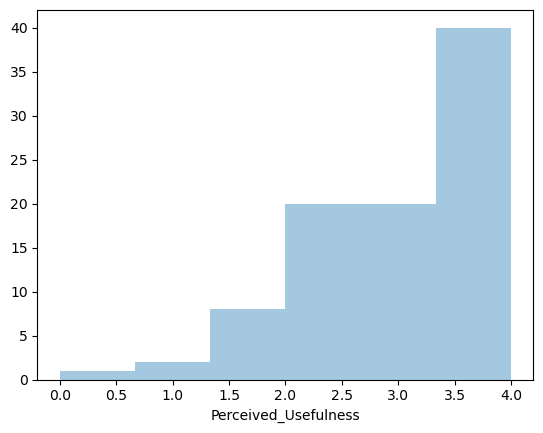

In [49]:
sns.distplot( a=general_table_2["Perceived_Usefulness"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='General_Attractiveness'>

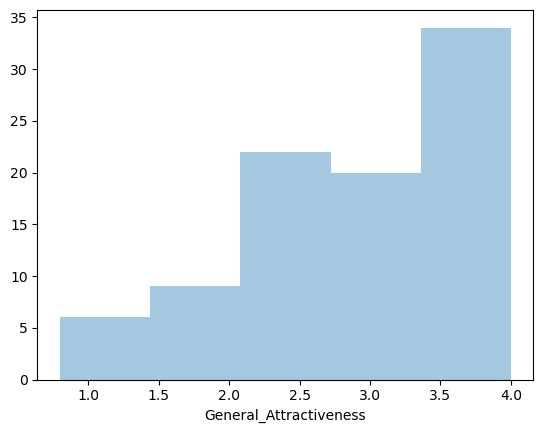

In [50]:
sns.distplot( a=general_table_2["General_Attractiveness"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='Behavioural_Intentions'>

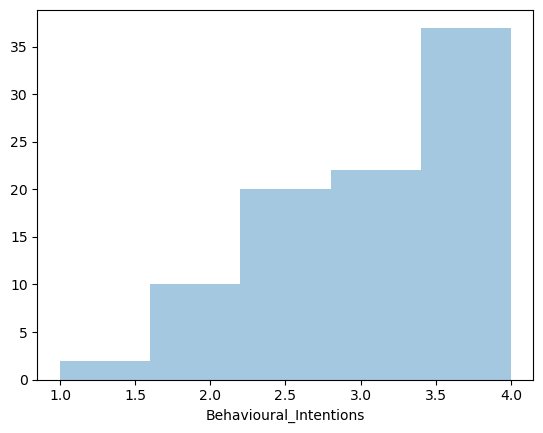

In [51]:
sns.distplot( a=general_table_2["Behavioural_Intentions"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='Prestige'>

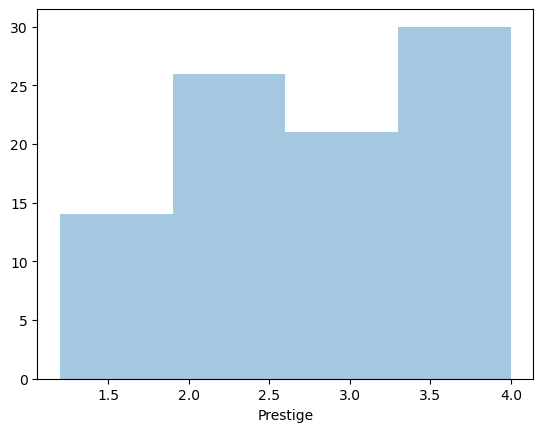

In [52]:
sns.distplot( a=general_table_2["Prestige"], hist=True, kde=False, rug=False )

### -Box Plot

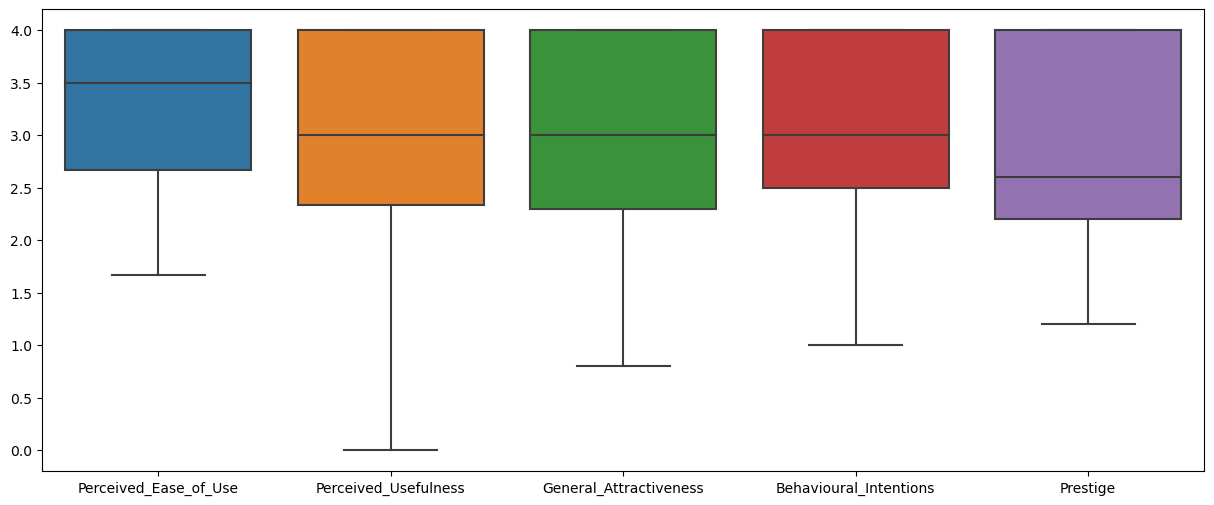

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=general_table_2.iloc[:,5:])
plt.show()

### -Violin Plot

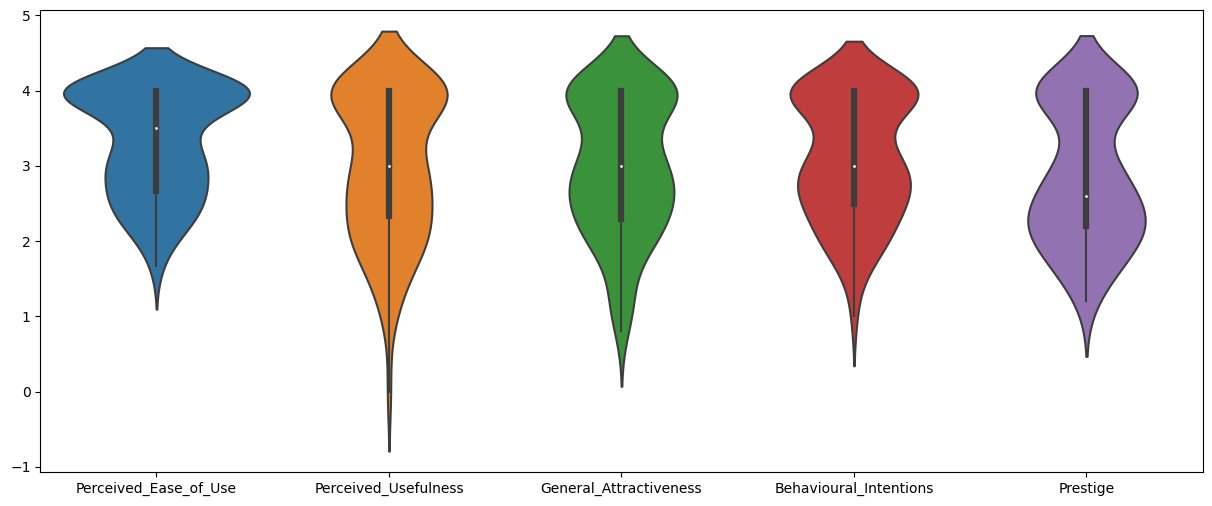

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(data=general_table_2.iloc[:,5:])
plt.show()